# **Laboratório 02 - Resolução de Equações Não-lineares**

Aluno: Carlos Eduardo Medeiros da Silva

**Método da Bissecção**

* passo 01 - Entradas $(a, b, tol)$ de modo que $f(a).f(b) < 0.$
* passo 02 - Estimativa da raiz
$$
x_r = \frac{a + b}{2}
$$

**se** $\,\,f(a).f(x_r) < 0$
$$
b \leftarrow x_r
$$
volte ao passo 02

**else**
$$
a \leftarrow x_r
$$

**se** $\,\,E_r \leq tol$ $\rightarrow x_r$ é solução.


Exemplo 01 - Obter uma raiz do seguinte polinômio:

$$
p(x) = 2x^2 - 5x + 3
$$

In [3]:
import matplotlib.pyplot as plt

import numpy as np
f = lambda x: 2*pow(x,2) - 5*x + 3
#Definida a função do metódo da bisserção;
def bissercao(a,b,tol,f):
    if f(a)*f(b) > 0:
        return "Valores de a e b não obdecem as regras"
    
    x0 = 0
    while True:
        
        xr = (a+b)/2
     
        if f(a)*f(xr) < 0:
            b = xr
        else:
            a = xr
        
        erro = abs(xr-x0)/xr
        if abs(erro) <= tol:
            return xr
        
        x0 = xr

print(bissercao(0,1,10e-5,f))
        

0.99993896484375


**Método de Newton**

* passo 01 - Defina $tol$ e escolha $x_0$ de modo que

$$
 f(x_0).f^{\prime \prime}(x_0) > 0.
$$

* passo 02 - para $i = 0,1,2, \cdots , n.$

$$
x_{i+1} = x_i - \frac{f(x_i)}{f^{\prime}(x_i)}
$$

**se** $\,\,E_r \leq tol$ $\rightarrow x_{i+1}$ é solução.

**else**

volte ao passo 02.

Entre com o valor:  8


0.5671432965302959


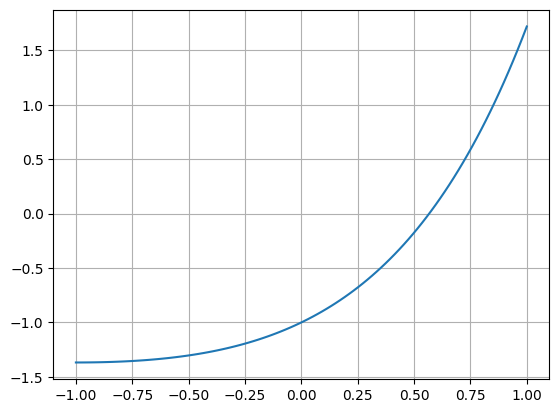

In [2]:
df = lambda x: x*np.exp(x) - 1
fs = lambda x: np.exp(x)*(1+x)
n = int(input("Entre com o valor: "))
x = 0.0

for i in range(n):
    xr = x - (df(x)/fs(x))
    if ( abs(xr-x) <= 10e-3):
        break
    else:
        x = xr
    
print(xr)

x =  np.linspace(-1,1,100)

plt.plot(x,df(x))
plt.grid()
plt.show()

In [ ]:
from scipy.optimize import newton,bisect
print(newton(f,x))
print(bisect(f,a,b))

**------------------------------------------------------------------ Exercícios ------------------------------------------------------------------**

**Exercício 01** - A frequência natural de uma certa viga uniforme possui uma relação com as raízes de $\alpha_i$ da equação

\begin{equation*}
f(\alpha) = cosh(\alpha)\,cos(\alpha) + 1 = 0,
\end{equation*}
onde
\begin{equation*}
\alpha_i^4 = (2\pi f_i)^2 \frac{mL^3}{EI}.
\end{equation*}

Sendo, $f_i$ a ${i\_}$ésima frequência natural, $m$ a massa da viga, $L$ o comprimento, $E$ o módulo da elasticidade e $I$ o momento de inércia da seção transversal. Determine as menores frequências de uma viga em aço de $0,9\,m$ de comprimento, com uma seção transversal de $25\,mm$ de largura e $2,5\,mm$ de altura. A densidade de massa do aço é de $7850\,\frac{kg}{m^3}$ e $E = 200GPa.$

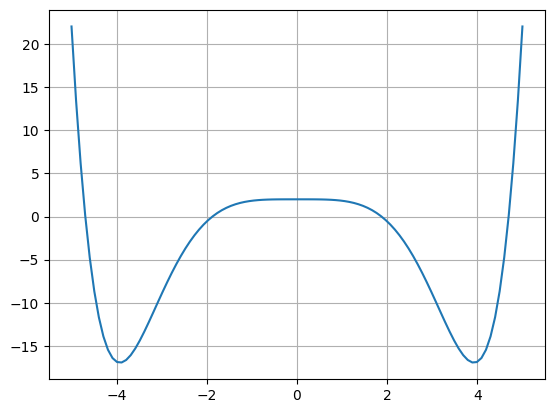

As menores frequências serão : 0.0088398Hz e 0.0014106Hz


In [7]:
L = 0.9
E = 200
rho = 7850
V = 0.9 * (25*10e-3) * (2.5*10e-3)
m = rho*V
I = ((25*10e-3) * pow(2.5*10e-3,3)) /12

fi = lambda a: pow((pow(a,4)*E*I)/(m*pow(L,3)*4*np.pi),1/2)
f = lambda a: np.cosh(a)*np.cos(a) + 1

x =  np.linspace(-5,5,100)

plt.plot(x,f(x))
plt.grid()
plt.show()

f1 = bissercao(-6,-4,1e-6,f)
f2 = bissercao(-3,0,1e-6,f)
f3 = bissercao(0,3,1e-6,f)
f4 = bissercao(4,6,1e-6,f)

print(f"As menores frequências serão : {fi(f1):.7f}Hz e {fi(f2):.7f}Hz") 


**Exercício 02** - A velocidade ascendente de um foguete pode ser calculada pela seguinte equação:

\begin{equation*}
    v = u.ln\left ( \frac{m_0}{m_0 - q.t} \right )-g.t
\end{equation*}

onde $v$ representa a velocidade de subida, $u$ é a velocidade na qual o combustível é repelido com relação ao foguete, $m_0$ é a massa inicial ($t = 0s$), $q$ é a taxa de consumo de combustível, e $g$ a aceleração da gravidade para baixo $g \approx 9,81 \frac{m}{s^2}$. Se $u = 2000 \frac{m}{s}$, $m_0 = 150.000 kg$, e $q = 2700 \frac{kg}{s}$. Calcule o instante no qual a velocidade é igual a $750 \frac{m}{s}$ com $10 \leq t\leq 50s$. Considere uma tolerância de $10^{-20}$.

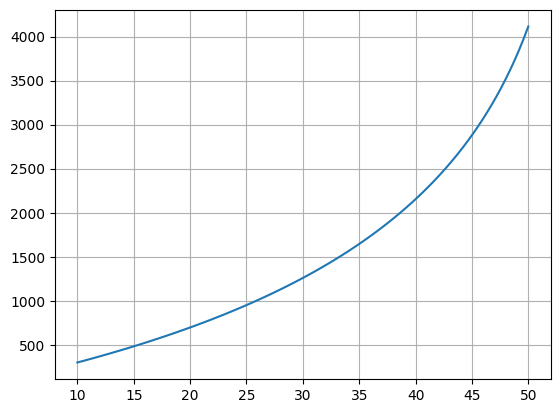

749.9999999999999
O ponto onde a v = 750m/s, é: 21.1324151


In [8]:
u = 2000
m0 = 150000
q = 2700
g = 9.81
v = lambda t: u*np.log( m0 /(m0 - q*t)) - g*t - 750

x = np.linspace(10,50,100)
f = lambda t: u*np.log( m0 /(m0 - q*t)) - g*t

plt.plot(x,f(x))
plt.grid()
plt.show()

t = bissercao(10,50,10e-20,v)
print(f(t))
print(f"O ponto onde a v = 750m/s, é: {t:.7f}")

**Exercício 03** - Considerando um dado sistema massa-mola com deslocamento harmônico dado por $y(t) = A\,sen(\omega\,t)$ imposto, a resposta do deslocamento da massa é dado por $x(t) = B sen(\omega\,t - \theta),$ onde

\begin{equation*}
\frac{B}{A} = \sqrt{(1 + D cos(\phi))^2 + (D sen(\phi))^2}\,\,\,\,e\,\,\,\, tan(\theta) = \frac{D sen(\phi)}{1 + D cos(\phi)}.
\end{equation*}

Nas duas equações usamos as seguintes notações,

\begin{equation*}
D = \frac{\left ( \frac{\omega}{p} \right )^2}{\sqrt{\left [ 1 - \left ( \frac{\omega}{p} \right )^2 \right ]^2+ \left (  \frac{2\zeta \omega}{p}\right )^2 }}\,\,\,\,e\,\,\,\,tan(\phi) = \frac{\frac{2\zeta \omega}{p}}{1 - \left ( \frac{\omega}{p} \right )^2}
\end{equation*}

com $p = \sqrt{\frac{k}{m}}$ sendo a frequência natural do sistema e $\zeta = \frac{c}{2mp}$ o fator de amortecimento. Considerando, $m = 0,2\,kg$, $k = 2880\,\frac{N}{m},$ e $\omega = 96\,\frac{rad}{s}$. Determine o menor valor de $c$ (coeficiente de amortecimento) de modo que a relação $\frac{B}{A}$ seja menor ou igual a $1,5$.

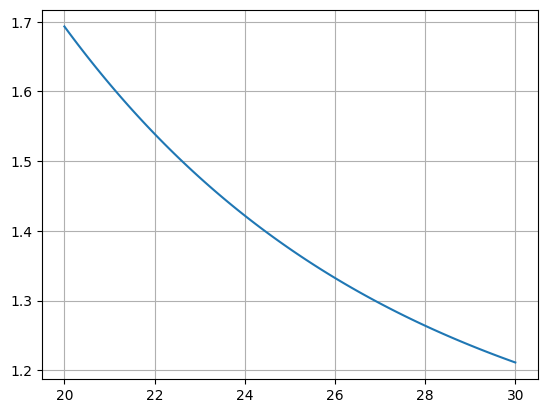

1.4999991157579697
O menor valor de c que deixa a razão A/B <=1,5 é 22.6089287


In [9]:
m = 0.2
k = 2880
w = 96
p = pow((k/m),0.5)
D = lambda c: pow(w/p,2)/ (pow(1- pow(w/p,2),2) + pow(c*w/(m*pow(p,2)),2))
fi = lambda c: np.arctan(pow((c*w / (m*pow(p,2)))/ (1- pow(w/p,2)),2))
f = lambda c: pow(pow(1 + D(c) * np.cos(fi(c)),2) + pow((D(c) * np.sin(fi(c))),2),0.5) 

v = lambda c: pow(pow(1 + D(c) * np.cos(fi(c)),2) + pow((D(c) * np.sin(fi(c))),2),0.5) - 1.5 

x =  np.linspace(20,30,100)

plt.plot(x,f(x))
plt.grid()
plt.show()

c = bissercao(20,30,1e-6,v)
print(f(c))
print(f"O menor valor de c que deixa a razão A/B <=1,5 é {c:.7f}")

**Exercício 04** - Escreva uma função $\it {raiz_{-}}$ ${\it {enesima(x, n, tol)}}$ para calcular $r = \sqrt[n]{x},$ por meio do método de Newton-Raphson.

In [3]:
def raiz_enesima(x,n,tol):
    x0 = 10e10
    f = lambda r: pow(r,n) - x 
    df1 = lambda r: n*pow(r,n-1)
    df2 = lambda r: n* (n-1)* pow(r,n-2)
    if f(x0)*df2(x0) <= 0:
        return "Escolha um x0 adequado"
    
    while True:
        xr = x0 - (f(x0)/df1(x0))
        if ( abs(xr-x0) <= tol):
            break
        else:
            x0 = xr

    return xr

x = float(input("Digite o valor de x: "))
n = int(input("Digite a enesima raiz: "))
tol = float(input("Digite a tolerancia desejada: "))

raiz_enesima(x,n,tol)


Digite o valor de x:  832
Digite a enesima raiz:  8
Digite a tolerancia desejada:  10e-6


2.3174769100392996